In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import sys
import os
sys.path.append(os.path.abspath('../common/'))
import common_functions as cf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, BayesianRidge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.svm import SVR
import datetime
from pvlib import solarposition

In [2]:
weather_path = 'Input/weather_train_set1.csv'
demand_path = 'Input/demand_train_set1.csv'
solar_path = 'Input/pv_train_set1.csv'
dp = cf.DataPreprocesser(weather_path, demand_path, solar_path)
dp.load_df()
dp.remove_nan()
dp.interpolate_df()
# dp.set_df(dp.df[dp.df['week']!=44])
dp.get_zenith_angle()
dp.df.head()

,demand_MW,irradiance_Wm-2,pv_power_mw,panel_temp_C,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,...,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,week,dow,hour,sp,zenith_angle
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-03 00:00:00,2.19,0.0,0.0,7.05,7.46,13.20,9.640,6.680,13.090,8.560,...,0.0,0.0,0.0,0.0,0.0,44,4,0,1.0,122.821452
2017-11-03 00:30:00,2.14,0.0,0.0,7.38,7.30,13.26,9.675,6.475,13.150,8.625,...,0.0,0.0,0.0,0.0,0.0,44,4,0,2.0,115.780705
2017-11-03 01:00:00,2.01,0.0,0.0,7.70,7.14,13.32,9.710,6.270,13.210,8.690,...,0.0,0.0,0.0,0.0,0.0,44,4,1,3.0,108.668070
2017-11-03 01:30:00,1.87,0.0,0.0,7.48,7.00,13.34,9.720,6.090,13.255,8.715,...,0.0,0.0,0.0,0.0,0.0,44,4,1,4.0,101.505357
2017-11-03 02:00:00,1.86,0.0,0.0,7.20,6.86,13.36,9.730,5.910,13.300,8.740,...,0.0,0.0,0.0,0.0,0.0,44,4,2,5.0,94.307845


In [4]:
dp.df.tail()

,demand_MW,irradiance_Wm-2,pv_power_mw,panel_temp_C,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,...,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,week,dow,hour,sp,zenith_angle
datetime,,,,,,,,,,,,,,,,,,,,,
2018-10-15 21:30:00,2.47,0.0,0.0,11.52,10.905,14.935,12.425,10.955,13.92,11.24,...,0.0,0.0,0.0,0.0,0.0,42,0,21,44.0,159.244128
2018-10-15 22:00:00,2.21,0.0,0.0,11.81,10.950,14.950,12.490,11.110,13.98,11.33,...,0.0,0.0,0.0,0.0,0.0,42,0,22,45.0,152.952412
2018-10-15 22:30:00,1.94,0.0,0.0,11.99,11.050,14.925,12.510,11.115,14.06,11.43,...,0.0,0.0,0.0,0.0,0.0,42,0,22,46.0,146.174409
2018-10-15 23:00:00,1.96,0.0,0.0,12.11,11.150,14.900,12.530,11.120,14.14,11.53,...,0.0,0.0,0.0,0.0,0.0,42,0,23,47.0,139.151751
2018-10-15 23:30:00,1.87,0.0,0.0,12.27,11.150,14.900,12.530,11.120,14.14,11.53,...,0.0,0.0,0.0,0.0,0.0,42,0,23,48.0,131.991990


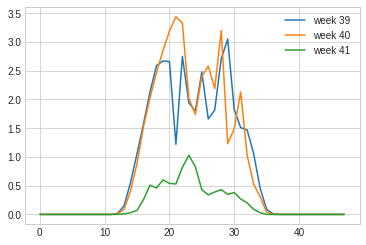

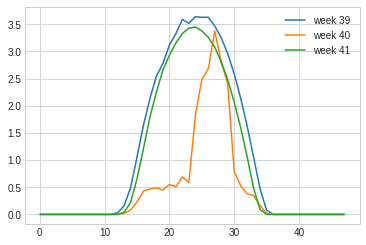

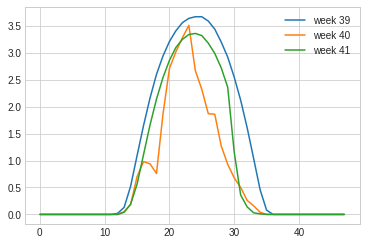

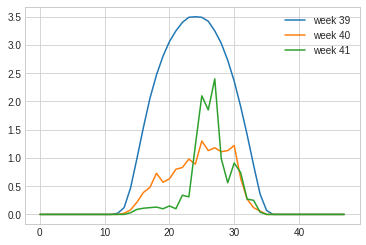

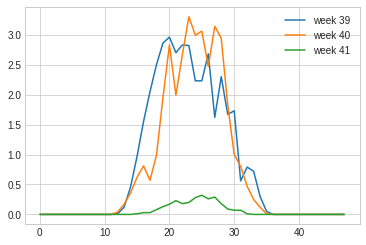

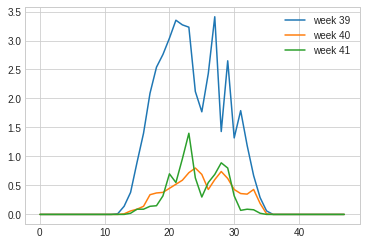

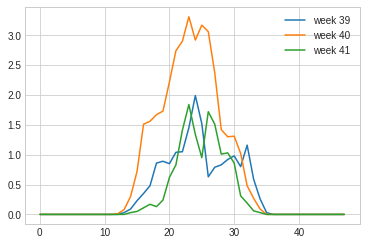

In [3]:
for i in range (7):
    for week in [39,40,41]:
        plt.plot(dp.df.loc[(dp.df['week'] == week) & (dp.df['dow'] == i), 'pv_power_mw'].values, label='week {}'.format(week))
    plt.legend()
    plt.show()

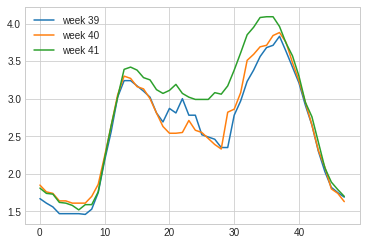

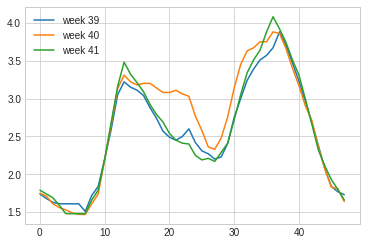

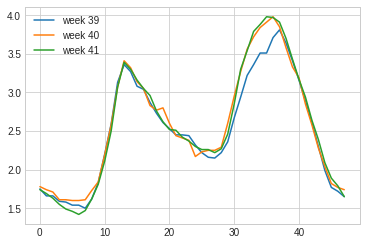

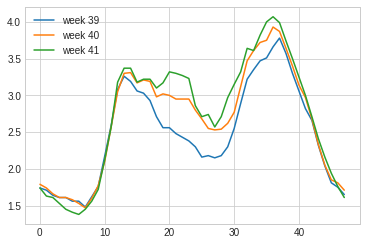

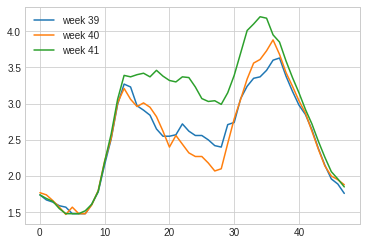

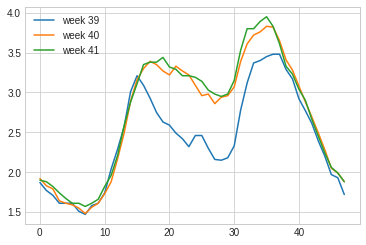

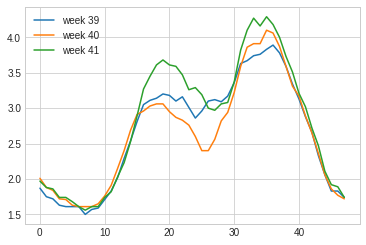

In [4]:
for i in range (7):
    for week in [39,40,41]:
        plt.plot(dp.df.loc[(dp.df['week'] == week) & (dp.df['dow'] == i), 'demand_MW'].values, label='week {}'.format(week))
    plt.legend()
    plt.show()

In [5]:
class MLPredictor2:
    def __init__(self, data_preprocess, first_day_prediction):
        self.data_preprocess = data_preprocess
        self.first_day_prediction = first_day_prediction
        self.predicted_df = data_preprocess.df.loc[(dp.df.index >= first_day_prediction+datetime.timedelta(days=-7)) & 
                                                   (dp.df.index < first_day_prediction), ['week', 'dow', 'sp', 'hour', 'zenith_angle']]
        self.predicted_df.index = self.predicted_df.index + pd.DateOffset(7)
        self.predicted_df['week']=self.predicted_df.index.week
        self.predicted_df['dow']=self.predicted_df.index.dayofweek
        self.predicted_df['hour'] = self.predicted_df.index.hour
        self.predicted_df['sp'] = self.predicted_df.hour*2 +self.predicted_df.index.minute/30 + 1
        lat = -4.034
        long = 50.33
        self.predicted_df['zenith_angle'] = solarposition.get_solarposition(self.predicted_df.index, lat, long)['apparent_zenith'].values
    def get_demand_previous_week(self):
        demand_prediction = self.data_preprocess.df.loc[(dp.df.index >= self.first_day_prediction+datetime.timedelta(days=-7)) & 
                                                   (dp.df.index < self.first_day_prediction), 'demand_MW'].values
        if self.predicted_df is not None:
            self.predicted_df['demand_MW'] = demand_prediction 
            return self.predicted_df
        return demand_prediction
    def get_weather_prediction(self,weather_path, pred_df=None):
        if pred_df is None:
            predicted_df = self.predicted_df
        else:
            predicted_df = demand_pred
        weather_prediction = pd.read_csv(weather_path,parse_dates=['datetime'],index_col=['datetime'])
        predicted_df = pd.merge(predicted_df,weather_prediction, how='outer', left_index=True, right_index=True)
        predicted_df = predicted_df.dropna(subset = ['demand_MW']).interpolate()
        self.predicted_df = predicted_df
        return self.predicted_df
    def predict_demand_from_past_and_weather(self, model, nb_week_before=4, first_day_pred=None, data=None, pred_df=None, weather_cols=None):
        if data is None:
            data_train = self.data_preprocess.df
        else:
            data_train = data
        if pred_df is None:
            predicted_df = self.predicted_df
        else:
            predicted_df = pred_df
        if weather_cols is None:
            weather_columns = self.data_preprocess.get_columns_of_group_names(['temp'], [1,2,5,6])
            weather_columns.append('dow')
            weather_columns.append('sp')
        else:
            weather_columns = weather_cols
        if first_day_pred is None:
            first_day_prediction = self.first_day_prediction
        else:
            first_day_prediction = first_day_pred
        data_train = data_train[(dp.df.index >= first_day_prediction+datetime.timedelta(days=(-7*nb_week_before))) & 
                                                   (dp.df.index < first_day_prediction)]
        X = data_train[weather_columns].to_numpy()
        y = data_train['demand_MW'].to_numpy()
        model.fit(X,y)
        predicted_df['demand_MW'] = model.predict(predicted_df[weather_columns].values)
        self.predicted_df = predicted_df
        return predicted_df
        
    def predict_solar_power_from_weather(self, model, data=None, pred_df=None, weather_cols=None):
        def solar_power_prediction_function(x, model, x_solar):
            if x_solar == 0:
                return 0
            else:
                return model.predict(x)[0]
        if data is None:
            data_train = self.data_preprocess.df
        else:
            data_train = data
        if pred_df is None:
            predicted_df = self.predicted_df
        else:
            predicted_df = pred_df
        if weather_cols is None:
            weather_columns = self.data_preprocess.get_columns_of_group_names(['solar'], [1,2,3,5,6])
            weather_columns += self.data_preprocess.get_columns_of_group_names(['temp'], [1,2])
            weather_columns.append('sp')
        else:
            weather_columns = weather_cols
        X = data_train.loc[data_train['solar_location1'] > 0, weather_columns].values
        y = data_train.loc[data_train['solar_location1'] > 0, 'pv_power_mw'].values
        model.fit(X,y)
        
        predicted_df['pv_power_mw'] = predicted_df.apply(lambda x: solar_power_prediction_function(
            np.array([x[weather_columns].to_numpy()]), model, x['solar_location1']), axis=1)
        self.predicted_df = predicted_df
        return predicted_df
    def predict_solar_power_weeks_before(self, model, nb_week_before=5, first_day_pred=None, data=None, pred_df=None, weather_cols=None):
        if data is None:
            data_train = self.data_preprocess.df
        else:
            data_train = data
        if pred_df is None:
            predicted_df = self.predicted_df
        else:
            predicted_df = pred_df
        if first_day_pred is None:
            first_day_prediction = self.first_day_prediction
        else:
            first_day_prediction = first_day_pred
        data_train = data_train[(dp.df.index >= first_day_prediction+datetime.timedelta(days=(-7*nb_week_before))) & 
                                                   (dp.df.index < first_day_prediction)]
        return self.predict_solar_power_from_weather(model, data=data_train, weather_cols=weather_cols)

In [20]:
dp.df[(dp.df.index >= (datetime.datetime(2018,10,15)+datetime.timedelta(days=-7))) & (dp.df.index < datetime.datetime(2018,10,15))]

,demand_MW,irradiance_Wm-2,pv_power_mw,panel_temp_C,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,...,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,week,dow,hour,sp,zenith_angle
datetime,,,,,,,,,,,,,,,,,,,,,
2018-10-08 00:00:00,1.81,0.0,0.0,10.69,10.440,13.140,10.210,9.090,13.220,11.220,...,0.0,0.0,0.0,0.0,0.0,41,0,0,1.0,125.771109
2018-10-08 00:30:00,1.74,0.0,0.0,10.89,10.585,13.120,10.290,9.280,13.265,11.360,...,0.0,0.0,0.0,0.0,0.0,41,0,0,2.0,118.388214
2018-10-08 01:00:00,1.73,0.0,0.0,10.90,10.730,13.100,10.370,9.470,13.310,11.500,...,0.0,0.0,0.0,0.0,0.0,41,0,1,3.0,110.982411
2018-10-08 01:30:00,1.62,0.0,0.0,11.00,10.805,13.095,10.375,9.650,13.350,11.595,...,0.0,0.0,0.0,0.0,0.0,41,0,1,4.0,103.560478
2018-10-08 02:00:00,1.61,0.0,0.0,11.14,10.880,13.090,10.380,9.830,13.390,11.690,...,0.0,0.0,0.0,0.0,0.0,41,0,2,5.0,96.126831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-14 21:30:00,2.47,0.0,0.0,9.16,8.985,12.555,10.015,8.830,12.670,10.200,...,0.0,0.0,0.0,0.0,0.0,41,6,21,44.0,159.510582
2018-10-14 22:00:00,2.11,0.0,0.0,8.79,8.840,12.480,9.900,8.740,12.450,9.950,...,0.0,0.0,0.0,0.0,0.0,41,6,22,45.0,153.169024
2018-10-14 22:30:00,1.92,0.0,0.0,9.09,8.765,12.420,9.840,8.690,12.290,9.845,...,0.0,0.0,0.0,0.0,0.0,41,6,22,46.0,146.356578


In [6]:
date_test = datetime.datetime(2018,10,15)+datetime.timedelta(days=0)

In [7]:
date_test = datetime.datetime(2018,10,15)+datetime.timedelta(days=0)
date_test.weekday()
date_test.isocalendar()[1]

42

In [8]:
class BatteryPowerDispatcher2:
    def __init__(self):
        return 
    def get_ideal_discharge_dispatch(df,week,dow, battery_charge=6):#afternoon discharge
    
        sl  = df.loc[(df['week']==week)&(df['dow']==dow)&(df['sp']>=32)&(df['sp']<=42),['demand_MW','pv_power_mw','hour']]
        peak_ini = sl['demand_MW'].max()

        peak_target  = peak_ini-2.5
        discharge = (sl['demand_MW']-peak_target).clip(lower = 0)

        energy =discharge.sum()*0.5
        sp = len(discharge[discharge>0])
    
        while (energy>battery_charge):

            peak_target  =  peak_target +0.01
            discharge = (sl['demand_MW']-peak_target).clip(lower=0)
            energy =discharge.sum()*0.5
        
        return(discharge,peak_ini,peak_target)
    
    def get_ideal_discharge_dispatch_in_a_week(self,df, first_day, max_battery_charge_in_week=[6,6,6,6,6,6,6]):
        res = pd.DataFrame(columns = ['peak_ini','peak_target','energy','solar_energy','duration','week','dow'])
        dispatch_summary = pd.DataFrame(index= range(32,43))
        idx = 0
        for i in range(0,7):
            the_date = first_day+datetime.timedelta(days=i)
            dow = the_date.weekday()
            week = the_date.isocalendar()[1]
            discharge,peak_ini,peak_target = self.get_ideal_discharge_dispatch(df,week,dow, max_battery_charge_in_week[dow])
            energy = discharge.sum()*0.5
            sp = len(discharge[discharge>0])
            dispatch_summary[str(week*10)+str(dow)]=discharge.values
            idx = idx+1
            solar_available = df.loc[(df['week']==week)&(df['dow']==dow)&(df['sp']<=31),'pv_power_mw'].sum()*0.5
            res.loc[idx,:] = [peak_ini,peak_target,energy,solar_available,sp,week,dow]
        return (dispatch_summary, res)
    
    def get_charge_of_battery_repartition(df, week, dow, max_charge=6):
        solar_power  = df.loc[(df['week']==week)&(df['dow']==dow)&(df['sp']<=31),['pv_power_mw','sp']]
        max_power = 2.5
        solar_power['pv_power_norm'] = solar_power['pv_power_mw'].apply(lambda x: min(x, max_power))
        max_charge_from_solar = solar_power['pv_power_norm'].sum()*0.5
        charge_from_solar = min(max_charge_from_solar, max_charge)
        solar_power['pv_power_norm'] = solar_power['pv_power_norm']*charge_from_solar / max_charge_from_solar
        max_charge_from_grid = max_charge-charge_from_solar
        battery_B = pd.DataFrame(data=solar_power['pv_power_norm'].to_list(),columns=['solar_B'],index=solar_power.index)
        charge_power_from_grid = pd.DataFrame(columns=['grid_B'])
        charge_from_grid = 0
        for idx in range(31):
            power_from_solar = solar_power['pv_power_norm'].values[idx]
            charge_power_from_grid.loc[idx,:] = min(max(max_power - power_from_solar,0), max(max_charge_from_grid - charge_from_grid,0)*2)
            charge_from_grid = charge_power_from_grid['grid_B'].sum()*0.5
        battery_B['sp'] = solar_power['sp'].to_list()
        battery_B['grid_B'] = charge_power_from_grid['grid_B'].to_list()
        battery_B['B'] = battery_B['solar_B'] + battery_B['grid_B']
        return (charge_from_solar, charge_from_grid, battery_B)
    
    def get_charge_of_battery_repartition2(df, week, dow, max_charge=6):
        solar_power = df.loc[(df['week']==week)&(df['dow']==dow)&(df['sp']<=31),['pv_power_mw','sp']]
        solar_power['ind'] = solar_power['sp'].apply(lambda x: int(x))
        max_power = 2.5
        uncertainty = 0.8
        ratio = solar_power['pv_power_mw'].apply(lambda x: min(x,max_power)).sum()*0.5
        if ratio > 1.5:
            coeff = uncertainty
        elif ratio > 1.2:
            coeff = 0.9
        else:
            coeff = 1
        solar_power = solar_power.sort_values('pv_power_mw', ascending=False)
        max_solar_charge = min(max_charge,solar_power['pv_power_mw'].apply(lambda x: min(x,2,5)).sum()*0.5)
        max_grid_charge = max_charge - max_solar_charge
        solar_charge = 0
        grid_charge = 0
        battery_B = pd.DataFrame(columns = ['ind', 'sp', 'solar_B', 'grid_B'])
        for i in range (len(solar_power)):
            solar_B = min(coeff*min(solar_power['pv_power_mw'][i], max_power), max(0,max_solar_charge - solar_charge)*2)
            grid_B = min(max_power-solar_B, max(0,(max_grid_charge-grid_charge)*2))
            battery_B.loc[i, :] = [solar_power['ind'][i], solar_power['sp'][i], solar_B, grid_B]
            solar_charge += solar_B*0.5
            grid_charge += grid_B*0.5
        battery_B['B'] = battery_B['solar_B'] + battery_B['grid_B']
        battery_B =battery_B.sort_values('ind', ascending = True)
        battery_B.index = df.loc[(df['week']==week)&(df['dow']==dow)&(df['sp']<=31),:].index
        battery_B = battery_B.drop('ind', axis=1)
        return (solar_charge, grid_charge, battery_B)
    
    def get_solar_energy_proportion_by_day_in_a_week(self,df,first_day, charge_method=1,max_battery_charge_in_week=[6,6,6,6,6,6,6]):
        B = pd.DataFrame(index= range(1,32))
        p_solar = []
        for i in range(7):
            the_date = first_day+datetime.timedelta(days=i)
            dow = the_date.weekday()
            week = the_date.isocalendar()[1]
            if charge_method == 1:
                charge_from_solar, charge_from_grid, battery_B = self.get_charge_of_battery_repartition(
                    df, week, dow, max_battery_charge_in_week[dow])
            elif charge_method == 2:
                charge_from_solar, charge_from_grid, battery_B = self.get_charge_of_battery_repartition2(
                    df, week, dow, max_battery_charge_in_week[dow])
            else:
                print("ERROR : charge mthod in (1,2)")
                return None, None
            B[str(week*10)+str(dow)] = battery_B['B'].to_list()
            p_solar.append(charge_from_solar/6)
        return p_solar, B
    def get_max_solar_energy_available(df, week, dow):
        solar_power  = df.loc[(df['week']==week)&(df['dow']==dow)&(df['sp']<=31),['pv_power_mw','sp']]
        return min(6,solar_power['pv_power_mw'].apply(lambda x: min(2.5, x)).sum()*0.5)
    def get_max_solar_energy_available_in_a_week(self,df, week):
        max_solar_energy_available = []
        for dow in range(7):
            max_solar_energy_available.append(self.get_max_solar_energy_available(df, week, dow))
        return max_solar_energy_available
    def get_end_of_the_day_dispatch(first_day):
        B_end_of_the_day = pd.DataFrame(index= range(43,49))
        for i in range(0,7):
            the_date = first_day+datetime.timedelta(days=i)
            dow = the_date.weekday()
            week = the_date.isocalendar()[1]
            B_end_of_the_day[str(week*10)+str(dow)]=0
        return B_end_of_the_day
    def get_all_dispatch_in_a_week(self,df, first_day, charge_method=1,full_solar=False):
        
        if full_solar:
            max_battery_charge_in_week = self.get_max_solar_energy_available_in_a_week(self, df, week)
        else:
            max_battery_charge_in_week = [6,6,6,6,6,6,6]
        p_solar, B_charge = self.get_solar_energy_proportion_by_day_in_a_week(self,df, first_day, charge_method,max_battery_charge_in_week)
        B_discharge, res = self.get_ideal_discharge_dispatch_in_a_week(self, df, first_day, max_battery_charge_in_week)
        B_discharge = -B_discharge
        B_end_of_the_day = self.get_end_of_the_day_dispatch(first_day)
        B_total = B_charge.append(B_discharge)
        B_total = B_total.append(B_end_of_the_day)
        return B_total
    def format_dispatching_for_competition(B, index):
        final_B = []
        for column in B.columns.to_list():
            final_B.append(B[column])
        final_B = pd.concat(final_B, ignore_index=True)
        final_B.index = index
        final_B = pd.DataFrame(final_B, columns=['charge_MW'])
        return final_B

In [9]:
first_day_prediction = datetime.datetime(2018,10,16) 


In [10]:
mp = MLPredictor2(dp,first_day_prediction)
mp.get_demand_previous_week()
mp.get_weather_prediction(weather_path)
weather_columns_pv = dp.get_columns_of_group_names(['solar'], [1,2,3,5,6])
weather_columns_pv += dp.get_columns_of_group_names(['temp'], [1,2])
weather_columns_pv.append('sp')
weather_columns_pv.append('zenith_angle')
weather_columns_demand = dp.get_columns_of_group_names(['temp'], [1,2,5,6])
weather_columns_demand.append('sp')
weather_columns_demand.append('dow')
        
#         predicted_data = mp.predicted_df
model_pv = RandomForestRegressor(random_state=2019, n_estimators = 300)
#         model_pv.fit(X_train_pv, y_train_pv)
mp.predict_solar_power_weeks_before(model_pv, weather_cols=weather_columns_pv)
#         predicted_data['pv_power_mw'] = model_pv.predict(predicted_data[weather_columns_pv].values)
model_demand = RandomForestRegressor(random_state=2019, n_estimators = 450)
#         model_demand.fit(X_train_demand, y_train_demand)
#         predicted_data['demand_MW'] = model_demand.predict(predicted_data[weather_columns_demand].values)
mp.predict_demand_from_past_and_weather(model_demand, weather_cols=weather_columns_demand)
bpd = BatteryPowerDispatcher2
B = bpd.get_all_dispatch_in_a_week(bpd,mp.predicted_df, first_day_prediction)
B_final = bpd.format_dispatching_for_competition(B, mp.predicted_df.index)

/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [42]:
B.sum()

4201    0.100978
4202    0.030711
4203    0.065356
4204    0.066711
4205    0.001756
4206    0.074378
4300    0.105044
dtype: float64

In [39]:
B_final

,charge_MW
datetime,
2018-10-16 00:00:00,0.0
2018-10-16 00:30:00,0.0
2018-10-16 01:00:00,0.0
2018-10-16 01:30:00,0.0
2018-10-16 02:00:00,0.0
...,...
2018-10-22 21:30:00,0.0
2018-10-22 22:00:00,0.0
2018-10-22 22:30:00,0.0


In [41]:
B_final.to_csv('Output/BGBattery_set1.csv')

In [47]:
first_day_prediction

datetime.datetime(2018, 10, 16, 0, 0)

In [11]:
mp.predicted_df

,week,dow,sp,hour,zenith_angle,demand_MW,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,pv_power_mw
datetime,,,,,,,,,,,,,,,,,,,
2018-10-16 00:00:00,42.0,1.0,1.0,0.0,124.748739,1.711867,11.650,14.870,12.670,11.450,14.190,11.740,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-16 00:30:00,42.0,1.0,2.0,0.0,117.451380,1.692067,11.810,14.850,12.650,11.610,14.190,11.720,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-16 01:00:00,42.0,1.0,3.0,1.0,110.117297,1.649911,11.970,14.830,12.630,11.770,14.190,11.700,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-16 01:30:00,42.0,1.0,4.0,1.0,102.757453,1.604933,11.930,14.825,12.600,11.750,14.155,11.645,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-16 02:00:00,42.0,1.0,5.0,2.0,95.379162,1.582000,11.890,14.820,12.570,11.730,14.120,11.590,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-22 21:30:00,43.0,0.0,44.0,21.0,157.393234,2.367400,7.985,12.885,8.845,6.710,12.530,8.720,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-22 22:00:00,43.0,0.0,45.0,22.0,151.445878,2.094222,8.010,12.760,8.980,6.220,12.400,8.890,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-22 22:30:00,43.0,0.0,46.0,22.0,144.915315,1.829200,7.705,12.690,8.615,5.925,12.360,8.695,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
demand_task2_path = '../task2/Input/demand_train_set2.csv'
solar_power_task2_path = '../task2/Input/pv_train_set2.csv'
weather_task2_path = '../task2/Input/weather_train_set2.csv'
dp_task2 = cf.DataPreprocesser(demand_path=demand_task2_path, solar_path=solar_power_task2_path, weather_path=weather_task2_path)
dp_task2.load_df()
dp_task2.remove_nan()
dp_task2.interpolate_df()

2018-10-16 00:00:00
1
42
12.597916666666674


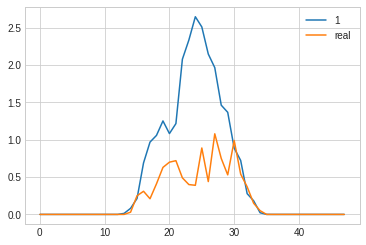

2018-10-17 00:00:00
2
42
8.312383333333337


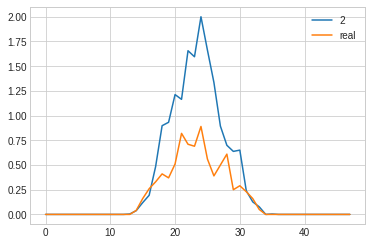

2018-10-18 00:00:00
3
42
13.760233333333336


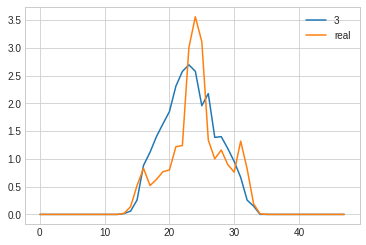

2018-10-19 00:00:00
4
42
6.9815333333333305


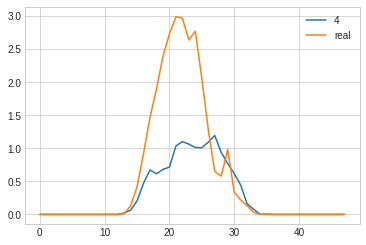

2018-10-20 00:00:00
5
42
14.93728333333334


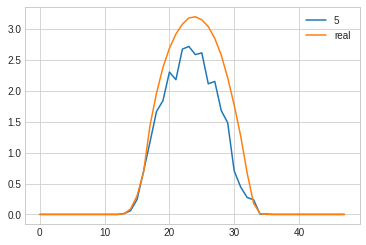

2018-10-21 00:00:00
6
42
13.61288333333334


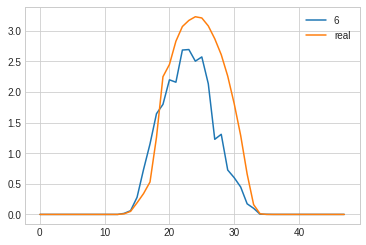

2018-10-22 00:00:00
0
43
15.620650000000007


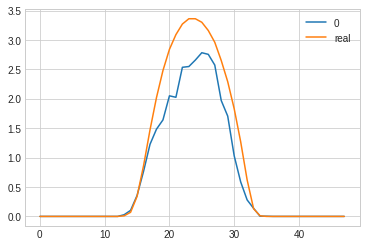

In [15]:
for i in range(7):
    the_date = first_day_prediction+datetime.timedelta(days=i)
    dow = the_date.weekday()
    week = the_date.isocalendar()[1]
    print(the_date)
    print(dow)
    print(week)
    print(mp.predicted_df.loc[(mp.predicted_df['week'] == week) & (mp.predicted_df['dow'] == dow), 'pv_power_mw'].sum()*0.5)
    plt.plot(mp.predicted_df.loc[(mp.predicted_df['week'] == week) & (mp.predicted_df['dow'] == dow), 'pv_power_mw'].values, label=dow)
    plt.plot(dp_task2.df.loc[(dp_task2.df['week'] == week) & (dp_task2.df['dow'] == dow), 'pv_power_mw'].values, label='real')
    plt.legend()
    plt.show()
    

2018-10-16 00:00:00
1
42


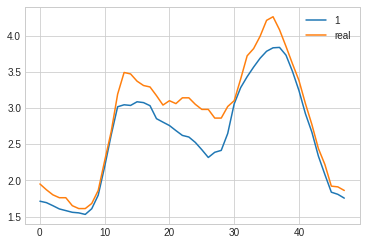

2018-10-17 00:00:00
2
42


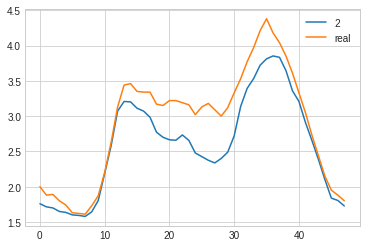

2018-10-18 00:00:00
3
42


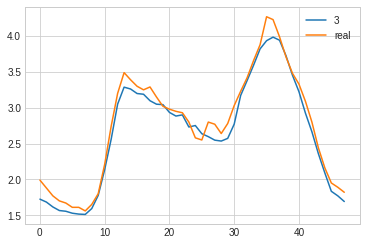

2018-10-19 00:00:00
4
42


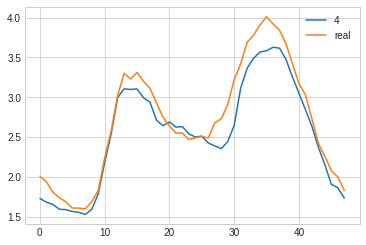

2018-10-20 00:00:00
5
42


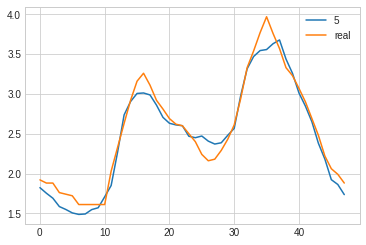

2018-10-21 00:00:00
6
42


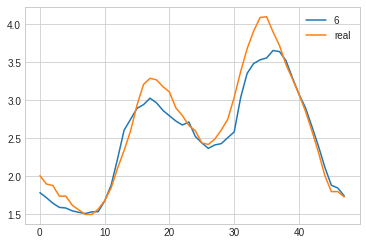

2018-10-22 00:00:00
0
43


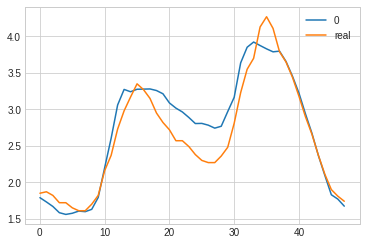

In [16]:
for i in range(7):
    the_date = first_day_prediction+datetime.timedelta(days=i)
    dow = the_date.weekday()
    week = the_date.isocalendar()[1]
    print(the_date)
    print(dow)
    print(week)
    plt.plot(mp.predicted_df.loc[(mp.predicted_df['week'] == week) & (mp.predicted_df['dow'] == dow), 'demand_MW'].values, label=dow)
    plt.plot(dp_task2.df.loc[(dp_task2.df['week']==week) & (dp_task2.df['dow'] == dow), 'demand_MW'].values, label='real')
    plt.legend()
    plt.show()